# 데이터 수집 라이브러리 활용연습




In [ ]:
!pip install beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# SSL 인증서를 다루는 패키지 certifi 업그레이드
!pip install --upgrade certifi

## 에러 해결 팁

1. urllib request.py urlopen SSL 인증서 에러 문제 해결

    https://gentlesark.tistory.com/57


2. pip upgrade error 처리

    https://woogyun.tistory.com/698

In [ ]:
# HTTPError, URLError
from urllib.request import urlopen
from urllib.error import HTTPError
from urllib.error import URLError

try:
    html = urlopen("https://pythonscrapingthisurldoesnotexist.com")
except HTTPError as e:
    print("The server returned an HTTP error")
except URLError as e:
    print("The server could not be found!")
else:
    print(html.read())

##연습문제

### github - REMitchell

[학습 포인트]
1. urllib.request 모듈을 사용하여 웹페이지의 HTML 소스코드를 가져오는 방법을 알 수 있습니다.
2. BeautifulSoup 모듈을 사용하여 HTML 소스코드를 파싱하는 방법을 알 수 있습니다.
3. BeautifulSoup 객체에서 특정 HTML 태그를 찾아내는 방법을 알 수 있습니다.
4. find() 메서드를 사용하여 HTML 태그의 특정 속성값을 찾아내는 방법을 알 수 있습니다.
5. 웹페이지의 HTML 소스코드를 가져와서 BeautifulSoup 객체로 파싱한 뒤, 필요한 정보를 추출하는 방법을 알 수 있습니다.

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

html = urlopen('https://github.com/REMitchell/python-scraping/blob/master/Chapter01_BeginningToScrape.ipynb')
bs = BeautifulSoup(html.read(),'html.parser')
print(bs.h1)

<h1 class="Overlay-title" id="warn-tag-match-create-branch-dialog-header">Name already in use</h1>


In [ ]:
html = urlopen('https://github.com/REMitchell/python-scraping/blob/master/Chapter01_BeginningToScrape.ipynb')
bs = BeautifulSoup(html.read(), 'lxml')
print(bs.h1)

<h1 class="Overlay-title" id="warn-tag-match-create-branch-dialog-header">Name already in use</h1>


In [ ]:
name = bs.h1.find('span',{'class':'Label Label--secondary v-align-middle mr-1'}).get_text()
name

'Public'

### pythonscraping.com


#### 정규표현식, 람다의 활용

[학습 포인트]
1.	BeautifulSoup 객체에서 정규표현식을 사용하여 특정 HTML 태그를 찾아내는 방법을 알 수 있습니다.
2.	find_all() 메서드와 lambda 표현식을 사용하여 HTML 태그를 찾아내는 방법을 알 수 있습니다.
3.	find_all() 메서드를 사용하여 HTML 소스코드에서 특정 텍스트를 포함한 HTML 태그를 찾아내는 방법을 알 수 있습니다.



In [ ]:
# 정규표현식과 BeautifulSoup
import requests
from bs4 import BeautifulSoup
import re

url = 'http://www.pythonscraping.com/pages/page3.html'
url_req = requests.get(url, verify=False)
html = url_req.text
bs = BeautifulSoup(html, 'html.parser')
images = bs.find_all('img', {'src':re.compile('\.\.\/img\/gifts/img.*\.jpg')})
for image in images: 
    print(image['src'])

../img/gifts/img1.jpg
../img/gifts/img2.jpg
../img/gifts/img3.jpg
../img/gifts/img4.jpg
../img/gifts/img6.jpg


/usr/local/lib/python3.9/dist-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.pythonscraping.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [ ]:
# 람다 표현식
bs.find_all(lambda tag: len(tag.attrs) == 2)

[<img src="../img/gifts/logo.jpg" style="float:left;"/>,
 <tr class="gift" id="gift1"><td>
 Vegetable Basket
 </td><td>
 This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
 <span class="excitingNote">Now with super-colorful bell peppers!</span>
 </td><td>
 $15.00
 </td><td>
 <img src="../img/gifts/img1.jpg"/>
 </td></tr>,
 <tr class="gift" id="gift2"><td>
 Russian Nesting Dolls
 </td><td>
 Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
 </td><td>
 $10,000.52
 </td><td>
 <img src="../img/gifts/img2.jpg"/>
 </td></tr>,
 <tr class="gift" id="gift3"><td>
 Fish Painting
 </td><td>
 If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Also hand-painted by trained monkeys!</span>
 </td><td>
 $10,005.00
 </td><td>
 <img src="../img/gifts/img3.jpg"/>
 </td>

In [ ]:
slists = bs.findAll('span', class_='excitingNote')
list(slists)

[<span class="excitingNote">Now with super-colorful bell peppers!</span>,
 <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>,
 <span class="excitingNote">Also hand-painted by trained monkeys!</span>,
 <span class="excitingNote">Or maybe he's only resting?</span>,
 <span class="excitingNote">Keep your friends guessing!</span>]

In [ ]:
bs.find_all(lambda tag: tag.get_text() == 'Or maybe he\'s only resting?')

[<span class="excitingNote">Or maybe he's only resting?</span>]

In [ ]:
bs.find_all('', text='Or maybe he\'s only resting?')

<ipython-input-71-e7f5215faf7a>:1: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  bs.find_all('', text='Or maybe he\'s only resting?')


["Or maybe he's only resting?"]

#### 부모, 형제 태그 다루기

[학습 포인트]

1.	BeautifulSoup 모듈의 parent 메서드와 parents 속성을 사용하여 HTML 태그의 부모 태그를 찾는 방법을 알 수 있습니다.
2.	BeautifulSoup 모듈의 next_sibling, next_siblings, previous_sibling, previous_siblings 메서드를 사용하여 HTML 태그의 형제 태그를 찾는 방법을 알 수 있습니다.



In [ ]:
# 부모 다루기 : parent, parents
import requests
from bs4 import BeautifulSoup

url = 'http://www.pythonscraping.com/pages/page3.html'
url_req = requests.get(url,verify=False)
html = url_req.text
bs = BeautifulSoup(html, 'html.parser')
print(bs.find('img',
              {'src':'../img/gifts/img1.jpg'})
      .parent.previous_sibling.get_text())


$15.00



/usr/local/lib/python3.9/dist-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.pythonscraping.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [ ]:
# 형제 다루기 : next_sibling(s), previous_sibling(s)
url = 'http://www.pythonscraping.com/pages/page3.html'
url_req = requests.get(url,verify=False)
html = url_req.text
bs = BeautifulSoup(html, "html.parser")
for sibling in bs.find('tr', {'class':'gift'}).td.next_siblings:
    print(sibling)


<td>
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
<span class="excitingNote">Now with super-colorful bell peppers!</span>
</td>
<td>
$15.00
</td>
<td>
<img src="../img/gifts/img1.jpg"/>
</td>


/usr/local/lib/python3.9/dist-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.pythonscraping.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


#### 전쟁과 평화 데이터 수집

데이터 수집 연습을 위해 톨스토이의 소설 '전쟁과 평화' 일부를 웹에서 수집합니다.

##### 모듈1
[학습 포인트]

1.	urllib 모듈의 Request, urlopen 함수를 사용하여 웹 페이지에 접근하는 방법
2.	SSL 인증서 오류를 우회하는 방법
3.	requests 모듈을 사용하여 웹 페이지에 접근하는 방법
4.	HTTP 응답 코드를 확인하여 페이지 접근 상태를 파악하는 방법
5.	웹 페이지의 HTML 코드를 가져와 파싱하는 방법



In [ ]:
from urllib.request import Request

html = Request('http://www.pythonscraping.com/pages/warandpeace.html')
print(html)
print(html.full_url)
print(html.type)
print(html.host)

http://www.pythonscraping.com/pages/warandpeace.html
http
www.pythonscraping.com


In [ ]:
# 인증 건너뛰기
from urllib.request import urlopen
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

html = urlopen('http://www.pythonscraping.com/pages/warandpeace.html')
print(html.read())

b'<html>\n<head>\n<style>\n.green{\n\tcolor:#55ff55;\n}\n.red{\n\tcolor:#ff5555;\n}\n#text{\n\twidth:50%;\n}\n</style>\n</head>\n<body>\n<h1>War and Peace</h1>\n<h2>Chapter 1</h2>\n<div id="text">\n"<span class="red">Well, Prince, so Genoa and Lucca are now just family estates of the\nBuonapartes. But I warn you, if you don\'t tell me that this means war,\nif you still try to defend the infamies and horrors perpetrated by\nthat Antichrist- I really believe he is Antichrist- I will have\nnothing more to do with you and you are no longer my friend, no longer\nmy \'faithful slave,\' as you call yourself! But how do you do? I see\nI have frightened you- sit down and tell me all the news.</span>"\n<p/>\nIt was in July, 1805, and the speaker was the well-known <span class="green">Anna\nPavlovna Scherer</span>, maid of honor and favorite of the <span class="green">Empress Marya\nFedorovna</span>. With these words she greeted <span class="green">Prince Vasili Kuragin</span>, a man\nof high ran

In [ ]:
from urllib.request import urlopen
import ssl

context = ssl._create_unverified_context()
# html = urlopen('https://github.com/bnv20/cakd5/blob/main/m2_%EB%B6%84%EC%84%9D%EB%9D%BC%EC%9D%B4%EB%B8%8C%EB%9F%AC%EB%A6%AC%ED%99%9C%EC%9A%A9/visualization/%EC%8B%9C%EA%B0%81%ED%99%94_%EA%B8%B0%EC%B4%88.ipynb')
html = urlopen('http://www.pythonscraping.com/pages/warandpeace.html',context=context)
print(html.read())

b'<html>\n<head>\n<style>\n.green{\n\tcolor:#55ff55;\n}\n.red{\n\tcolor:#ff5555;\n}\n#text{\n\twidth:50%;\n}\n</style>\n</head>\n<body>\n<h1>War and Peace</h1>\n<h2>Chapter 1</h2>\n<div id="text">\n"<span class="red">Well, Prince, so Genoa and Lucca are now just family estates of the\nBuonapartes. But I warn you, if you don\'t tell me that this means war,\nif you still try to defend the infamies and horrors perpetrated by\nthat Antichrist- I really believe he is Antichrist- I will have\nnothing more to do with you and you are no longer my friend, no longer\nmy \'faithful slave,\' as you call yourself! But how do you do? I see\nI have frightened you- sit down and tell me all the news.</span>"\n<p/>\nIt was in July, 1805, and the speaker was the well-known <span class="green">Anna\nPavlovna Scherer</span>, maid of honor and favorite of the <span class="green">Empress Marya\nFedorovna</span>. With these words she greeted <span class="green">Prince Vasili Kuragin</span>, a man\nof high ran

In [ ]:
import requests
URL = 'http://www.pythonscraping.com/pages/warandpeace.html'
response = requests.get(URL)
print(response.status_code)
print(response.text)

200
<html>
<head>
<style>
.green{
	color:#55ff55;
}
.red{
	color:#ff5555;
}
#text{
	width:50%;
}
</style>
</head>
<body>
<h1>War and Peace</h1>
<h2>Chapter 1</h2>
<div id="text">
"<span class="red">Well, Prince, so Genoa and Lucca are now just family estates of the
Buonapartes. But I warn you, if you don't tell me that this means war,
if you still try to defend the infamies and horrors perpetrated by
that Antichrist- I really believe he is Antichrist- I will have
nothing more to do with you and you are no longer my friend, no longer
my 'faithful slave,' as you call yourself! But how do you do? I see
I have frightened you- sit down and tell me all the news.</span>"
<p/>
It was in July, 1805, and the speaker was the well-known <span class="green">Anna
Pavlovna Scherer</span>, maid of honor and favorite of the <span class="green">Empress Marya
Fedorovna</span>. With these words she greeted <span class="green">Prince Vasili Kuragin</span>, a man
of high rank and importance, who was the fir

##### 모듈2

1.	requests 모듈을 사용하여 웹 페이지 데이터를 가져오는 방법
2.	문자열 메서드를 사용하여 웹 페이지 데이터에서 특정 문자열을 찾는 방법
3.	BeautifulSoup 라이브러리를 사용하여 HTML 코드를 분석하는 방법
4.	find() 메서드를 사용하여 HTML 코드에서 원하는 태그를 추출하는 방법


In [ ]:
import requests
url = 'http://www.pythonscraping.com/pages/warandpeace.html'
# url_req = requests.get(url,verify=False)
url_req = requests.get(url)
html_data = url_req.text
print(html_data.find('St. Petersburg'))
print(html_data[1199:1213])

1199
St. Petersburg


In [ ]:
# id를 지정해 요소 추출
from bs4 import BeautifulSoup

html = """
<html><body>
  <h1 id="title">스크레이핑이란?</h1>
  <p id="body">웹 페이지를 분석하는 것</p>
  <p>원하는 부분을 추출하는 것</p>
</body></html>
"""

# HTML 분석하기 --- (※1)
soup = BeautifulSoup(html, 'html.parser')

# find() 메서드로 원하는 부분 추출하기 --- (※2)
title = soup.find(id="title")
body = soup.find(id="body")

# 텍스트 부분 출력하기
print("#title=" + title.string)
print("#body=" + body.string)

#title=스크레이핑이란?
#body=웹 페이지를 분석하는 것


##### 모듈3



1.	requests 모듈을 사용하여 웹 페이지 데이터를 가져오는 방법
2.	BeautifulSoup 라이브러리를 사용하여 HTML 코드를 분석하는 방법
3.	BeautifulSoup 객체를 출력하여 HTML 코드를 확인하는 방법


In [ ]:
import requests
from bs4 import BeautifulSoup
url = 'http://www.pythonscraping.com/pages/warandpeace.html'
url_req = requests.get(url,verify=False)
html = url_req.text
bs = BeautifulSoup(html, "html.parser")
print(bs)

/usr/local/lib/python3.9/dist-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.pythonscraping.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


<html>
<head>
<style>
.green{
	color:#55ff55;
}
.red{
	color:#ff5555;
}
#text{
	width:50%;
}
</style>
</head>
<body>
<h1>War and Peace</h1>
<h2>Chapter 1</h2>
<div id="text">
"<span class="red">Well, Prince, so Genoa and Lucca are now just family estates of the
Buonapartes. But I warn you, if you don't tell me that this means war,
if you still try to defend the infamies and horrors perpetrated by
that Antichrist- I really believe he is Antichrist- I will have
nothing more to do with you and you are no longer my friend, no longer
my 'faithful slave,' as you call yourself! But how do you do? I see
I have frightened you- sit down and tell me all the news.</span>"
<p></p>
It was in July, 1805, and the speaker was the well-known <span class="green">Anna
Pavlovna Scherer</span>, maid of honor and favorite of the <span class="green">Empress Marya
Fedorovna</span>. With these words she greeted <span class="green">Prince Vasili Kuragin</span>, a man
of high rank and importance, who was the firs

##### 모듈4

1.	requests 모듈을 사용하여 웹 페이지 데이터를 가져오는 방법
2.	BeautifulSoup 라이브러리를 사용하여 HTML 코드를 분석하는 방법
3.	BeautifulSoup 객체에서 태그를 추출하는 방법
4.	BeautifulSoup 객체에서 태그의 속성 값을 추출하는 방법
5.	BeautifulSoup 객체에서 태그의 텍스트를 추출하는 방법
6.	BeautifulSoup 객체에서 find() 함수를 사용하여 원하는 태그를 추출하는 방법
7.	BeautifulSoup 객체에서 findAll() 함수를 사용하여 원하는 태그들을 모두 추출하는 방법
8.	BeautifulSoup 객체에서 text 속성과 get_text() 함수를 사용하여 태그 안에 있는 텍스트를 추출하는 방법
9.	for 반복문을 사용하여 추출한 태그나 텍스트를 반복적으로 처리하는 방법



In [ ]:
import requests
from bs4 import BeautifulSoup
url = 'http://www.pythonscraping.com/pages/warandpeace.html'
url_req = requests.get(url,verify=False)
html = url_req.text
bs = BeautifulSoup(html, "html.parser")
d1 = bs.find(id='text')
d2 = bs.find('span',{'class':'red'})
print(d1.get_text)

/usr/local/lib/python3.9/dist-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.pythonscraping.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


<bound method PageElement.get_text of <div id="text">
"<span class="red">Well, Prince, so Genoa and Lucca are now just family estates of the
Buonapartes. But I warn you, if you don't tell me that this means war,
if you still try to defend the infamies and horrors perpetrated by
that Antichrist- I really believe he is Antichrist- I will have
nothing more to do with you and you are no longer my friend, no longer
my 'faithful slave,' as you call yourself! But how do you do? I see
I have frightened you- sit down and tell me all the news.</span>"
<p></p>
It was in July, 1805, and the speaker was the well-known <span class="green">Anna
Pavlovna Scherer</span>, maid of honor and favorite of the <span class="green">Empress Marya
Fedorovna</span>. With these words she greeted <span class="green">Prince Vasili Kuragin</span>, a man
of high rank and importance, who was the first to arrive at her
reception. <span class="green">Anna Pavlovna</span> had had a cough for some days. She was, as
she sai

In [ ]:
print(d2.get_text)

<bound method PageElement.get_text of <span class="red">Well, Prince, so Genoa and Lucca are now just family estates of the
Buonapartes. But I warn you, if you don't tell me that this means war,
if you still try to defend the infamies and horrors perpetrated by
that Antichrist- I really believe he is Antichrist- I will have
nothing more to do with you and you are no longer my friend, no longer
my 'faithful slave,' as you call yourself! But how do you do? I see
I have frightened you- sit down and tell me all the news.</span>>


In [ ]:
print(d2.string)

Well, Prince, so Genoa and Lucca are now just family estates of the
Buonapartes. But I warn you, if you don't tell me that this means war,
if you still try to defend the infamies and horrors perpetrated by
that Antichrist- I really believe he is Antichrist- I will have
nothing more to do with you and you are no longer my friend, no longer
my 'faithful slave,' as you call yourself! But how do you do? I see
I have frightened you- sit down and tell me all the news.


In [ ]:
bs.find('span',{'class':'green'}).string

'Anna\nPavlovna Scherer'

In [ ]:
# 전쟁과 평화에 등장하는 모든 고유명사 출력
# findAll 함수를 쓰면 <span class="green"></span> 태그에 들어있는 텍스트만 선택하여 고유명사 추출
nameList = bs.findAll('span',{'class':'green'}) # tagName, tagAttributes
nameList

[<span class="green">Anna
 Pavlovna Scherer</span>,
 <span class="green">Empress Marya
 Fedorovna</span>,
 <span class="green">Prince Vasili Kuragin</span>,
 <span class="green">Anna Pavlovna</span>,
 <span class="green">St. Petersburg</span>,
 <span class="green">the prince</span>,
 <span class="green">Anna Pavlovna</span>,
 <span class="green">Anna Pavlovna</span>,
 <span class="green">the prince</span>,
 <span class="green">the prince</span>,
 <span class="green">the prince</span>,
 <span class="green">Prince Vasili</span>,
 <span class="green">Anna Pavlovna</span>,
 <span class="green">Anna Pavlovna</span>,
 <span class="green">the prince</span>,
 <span class="green">Wintzingerode</span>,
 <span class="green">King of Prussia</span>,
 <span class="green">le Vicomte de Mortemart</span>,
 <span class="green">Montmorencys</span>,
 <span class="green">Rohans</span>,
 <span class="green">Abbe Morio</span>,
 <span class="green">the Emperor</span>,
 <span class="green">the prince</span>,
 

In [ ]:
for name in nameList:
    print(name.get_text()) #태그를 제외하고 콘텐츠만 출력

Anna
Pavlovna Scherer
Empress Marya
Fedorovna
Prince Vasili Kuragin
Anna Pavlovna
St. Petersburg
the prince
Anna Pavlovna
Anna Pavlovna
the prince
the prince
the prince
Prince Vasili
Anna Pavlovna
Anna Pavlovna
the prince
Wintzingerode
King of Prussia
le Vicomte de Mortemart
Montmorencys
Rohans
Abbe Morio
the Emperor
the prince
Prince Vasili
Dowager Empress Marya Fedorovna
the baron
Anna Pavlovna
the Empress
the Empress
Anna Pavlovna's
Her Majesty
Baron
Funke
The prince
Anna
Pavlovna
the Empress
The prince
Anatole
the prince
The prince
Anna
Pavlovna
Anna Pavlovna


In [ ]:
bs.findAll(id='text')

[<div id="text">
 "<span class="red">Well, Prince, so Genoa and Lucca are now just family estates of the
 Buonapartes. But I warn you, if you don't tell me that this means war,
 if you still try to defend the infamies and horrors perpetrated by
 that Antichrist- I really believe he is Antichrist- I will have
 nothing more to do with you and you are no longer my friend, no longer
 my 'faithful slave,' as you call yourself! But how do you do? I see
 I have frightened you- sit down and tell me all the news.</span>"
 <p></p>
 It was in July, 1805, and the speaker was the well-known <span class="green">Anna
 Pavlovna Scherer</span>, maid of honor and favorite of the <span class="green">Empress Marya
 Fedorovna</span>. With these words she greeted <span class="green">Prince Vasili Kuragin</span>, a man
 of high rank and importance, who was the first to arrive at her
 reception. <span class="green">Anna Pavlovna</span> had had a cough for some days. She was, as
 she said, suffering from la gr

In [ ]:
bs.find(text="I can't help it,")

<ipython-input-30-74af412623c7>:1: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  bs.find(text="I can't help it,")


"I can't help it,"

In [ ]:
nameList = bs.findAll(text='the prince')
print(len(nameList))

7


<ipython-input-31-f80c5bbfda5d>:1: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  nameList = bs.findAll(text='the prince')


In [ ]:
bs.find(id = 'text').get_text()
# bs.find(id = 'text').string

'\n"Well, Prince, so Genoa and Lucca are now just family estates of the\nBuonapartes. But I warn you, if you don\'t tell me that this means war,\nif you still try to defend the infamies and horrors perpetrated by\nthat Antichrist- I really believe he is Antichrist- I will have\nnothing more to do with you and you are no longer my friend, no longer\nmy \'faithful slave,\' as you call yourself! But how do you do? I see\nI have frightened you- sit down and tell me all the news."\n\nIt was in July, 1805, and the speaker was the well-known Anna\nPavlovna Scherer, maid of honor and favorite of the Empress Marya\nFedorovna. With these words she greeted Prince Vasili Kuragin, a man\nof high rank and importance, who was the first to arrive at her\nreception. Anna Pavlovna had had a cough for some days. She was, as\nshe said, suffering from la grippe; grippe being then a new word in\nSt. Petersburg, used only by the elite.\n\nAll her invitations without exception, written in French, and\ndeliver

In [ ]:
# text = bs.findAll(id = 'text',class_='red')
texts = bs.findAll(id = 'text')
len(texts)

1

##### 모듈5

1.	requests 모듈을 사용하여 웹 페이지 데이터를 가져오는 방법
2.	BeautifulSoup 라이브러리를 사용하여 HTML 코드를 분석하는 방법
3.	findAll() 함수를 사용하여 태그들을 추출하는 방법
4.	div 태그를 찾는 방법
5.	find() 함수와 findAll() 함수의 차이점
6.	for 반복문을 사용하여 추출한 태그나 텍스트를 반복적으로 처리하는 방법



In [ ]:
# 문서의 모든 헤더 태그를 반환
url = 'http://www.pythonscraping.com/pages/warandpeace.html'
url_req = requests.get(url,verify=False)
html = url_req.text
bs = BeautifulSoup(html, "html.parser")
bs.findAll({'h1','h2','h3','h5','h6'})

/usr/local/lib/python3.9/dist-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.pythonscraping.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


[<h1>War and Peace</h1>, <h2>Chapter 1</h2>]

In [ ]:
texts = bs.div.findAll('span',{'class':'red'})
print(len(texts),'\n')
for i,t in enumerate(texts):
    if i < 5:
        print(f'text{i+1}\n{t.get_text()}\n')
    else:
        pass

34 

text1
Well, Prince, so Genoa and Lucca are now just family estates of the
Buonapartes. But I warn you, if you don't tell me that this means war,
if you still try to defend the infamies and horrors perpetrated by
that Antichrist- I really believe he is Antichrist- I will have
nothing more to do with you and you are no longer my friend, no longer
my 'faithful slave,' as you call yourself! But how do you do? I see
I have frightened you- sit down and tell me all the news.

text2
If you have nothing better to do, Count [or Prince], and if the
prospect of spending an evening with a poor invalid is not too
terrible, I shall be very charmed to see you tonight between 7 and 10-
Annette Scherer.

text3
Heavens! what a virulent attack!

text4
First of all, dear friend, tell me how you are. Set your friend's
mind at rest,

text5
Can one be well while suffering morally? Can one be calm in times
like these if one has any feeling?



In [ ]:
bs.div.find('span',{'class':'red'}).get_text()

"Well, Prince, so Genoa and Lucca are now just family estates of the\nBuonapartes. But I warn you, if you don't tell me that this means war,\nif you still try to defend the infamies and horrors perpetrated by\nthat Antichrist- I really believe he is Antichrist- I will have\nnothing more to do with you and you are no longer my friend, no longer\nmy 'faithful slave,' as you call yourself! But how do you do? I see\nI have frightened you- sit down and tell me all the news."

In [ ]:
lists = bs.div.findAll('span',{'class':'red'})
for li in lists:
    print(li.get_text())

Well, Prince, so Genoa and Lucca are now just family estates of the
Buonapartes. But I warn you, if you don't tell me that this means war,
if you still try to defend the infamies and horrors perpetrated by
that Antichrist- I really believe he is Antichrist- I will have
nothing more to do with you and you are no longer my friend, no longer
my 'faithful slave,' as you call yourself! But how do you do? I see
I have frightened you- sit down and tell me all the news.
If you have nothing better to do, Count [or Prince], and if the
prospect of spending an evening with a poor invalid is not too
terrible, I shall be very charmed to see you tonight between 7 and 10-
Annette Scherer.
Heavens! what a virulent attack!
First of all, dear friend, tell me how you are. Set your friend's
mind at rest,
Can one be well while suffering morally? Can one be calm in times
like these if one has any feeling?
You are
staying the whole evening, I hope?
And the fete at the English ambassador's? Today is Wednesday.

##### 모듈6

1.	urllib.request 모듈을 사용하여 URL에서 HTML 데이터를 가져오는 방법
2.	BeautifulSoup 라이브러리를 사용하여 HTML 코드를 분석하는 방법
3.	BeautifulSoup 객체에서 find() 함수를 사용하여 원하는 태그를 추출하는 방법



In [ ]:
# <table id="giftList">
from urllib.request import urlopen
from bs4 import BeautifulSoup
import ssl

context = ssl._create_unverified_context()
html = urlopen('http://www.pythonscraping.com/pages/page3.html',context=context)
bs = BeautifulSoup(html, 'html.parser')
bs.find('table')

<table id="giftList">
<tr><th>
Item Title
</th><th>
Description
</th><th>
Cost
</th><th>
Image
</th></tr>
<tr class="gift" id="gift1"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
<span class="excitingNote">Now with super-colorful bell peppers!</span>
</td><td>
$15.00
</td><td>
<img src="../img/gifts/img1.jpg"/>
</td></tr>
<tr class="gift" id="gift2"><td>
Russian Nesting Dolls
</td><td>
Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
</td><td>
$10,000.52
</td><td>
<img src="../img/gifts/img2.jpg"/>
</td></tr>
<tr class="gift" id="gift3"><td>
Fish Painting
</td><td>
If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Also hand-painted by trained monkeys!</span>
</td><td>
$10,005.00
</td><td>
<img src="../img/gift

##### 모듈7

1.	urllib.request 모듈을 사용하여 URL에서 HTML 데이터를 가져오는 방법
2.	BeautifulSoup 라이브러리를 사용하여 HTML 코드를 분석하는 방법
3.	BeautifulSoup 객체에서 find() 함수를 사용하여 원하는 태그를 추출하는 방법
4.	BeautifulSoup 객체에서 children 속성을 사용하여 특정 태그의 자식 태그 목록을 추출하는 방법
5.	for 반복문을 사용하여 추출한 태그 목록을 반복적으로 처리하는 방법



In [1]:
# giftList 테이블에 들어 있는 제품 행 목록을 출력
from urllib.request import urlopen
from bs4 import BeautifulSoup
import ssl

context = ssl._create_unverified_context()
html = urlopen('http://www.pythonscraping.com/pages/page3.html',context=context)
bs = BeautifulSoup(html, 'html.parser')

for child in bs.find('table',{'id':'giftList'}).children:
# for child in bs.find('table',{'id':'giftList'}).descendants:
    print(child)



<tr><th>
Item Title
</th><th>
Description
</th><th>
Cost
</th><th>
Image
</th></tr>


<tr class="gift" id="gift1"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
<span class="excitingNote">Now with super-colorful bell peppers!</span>
</td><td>
$15.00
</td><td>
<img src="../img/gifts/img1.jpg"/>
</td></tr>


<tr class="gift" id="gift2"><td>
Russian Nesting Dolls
</td><td>
Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
</td><td>
$10,000.52
</td><td>
<img src="../img/gifts/img2.jpg"/>
</td></tr>


<tr class="gift" id="gift3"><td>
Fish Painting
</td><td>
If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Also hand-painted by trained monkeys!</span>
</td><td>
$10,005.00
</td><td>
<img src="../img/gifts/img3.jpg"/>


##### 모듈8

1.	urllib.request 모듈을 사용하여 URL에서 HTML 데이터를 가져오는 방법
2.	BeautifulSoup 라이브러리를 사용하여 HTML 코드를 분석하는 방법
3.	BeautifulSoup 객체에서 find() 함수를 사용하여 원하는 태그를 추출하는 방법
4.	BeautifulSoup 객체에서 tr 속성과 next_siblings 속성을 사용하여 형제 태그 목록을 추출하는 방법
5.	for 반복문을 사용하여 추출한 형제 태그 목록을 반복적으로 처리하는 방법



In [ ]:
# 제품 테이블에서 첫번째 타이틀 행을 제외한 모든 제품 행
from urllib.request import urlopen
from bs4 import BeautifulSoup
import ssl

context = ssl._create_unverified_context()
html = urlopen('http://www.pythonscraping.com/pages/page3.html',context=context)
bs = BeautifulSoup(html, 'html.parser')

for sibling in bs.find('table', {'id':'giftList'}).tr.next_siblings:
    print(sibling) 



<tr class="gift" id="gift1"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
<span class="excitingNote">Now with super-colorful bell peppers!</span>
</td><td>
$15.00
</td><td>
<img src="../img/gifts/img1.jpg"/>
</td></tr>


<tr class="gift" id="gift2"><td>
Russian Nesting Dolls
</td><td>
Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
</td><td>
$10,000.52
</td><td>
<img src="../img/gifts/img2.jpg"/>
</td></tr>


<tr class="gift" id="gift3"><td>
Fish Painting
</td><td>
If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Also hand-painted by trained monkeys!</span>
</td><td>
$10,005.00
</td><td>
<img src="../img/gifts/img3.jpg"/>
</td></tr>


<tr class="gift" id="gift4"><td>
Dead Parrot
</td><td>
This is an ex-parr

### wikipedia 데이터 수집


##### 모듈1

1.	urllib.request 모듈을 사용하여 URL에서 HTML 데이터를 가져오는 방법
2.	BeautifulSoup 라이브러리를 사용하여 HTML 코드를 분석하는 방법
3.	BeautifulSoup 객체에서 find_all() 함수를 사용하여 원하는 태그들을 모두 추출하는 방법
4.	BeautifulSoup 객체에서 attrs 속성을 사용하여 태그의 속성 값들을 추출하는 방법
5.	for 반복문을 사용하여 추출한 태그의 속성 값들을 반복적으로 처리하는 방법



In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

html = urlopen('http://en.wikipedia.org/wiki/Kevin_Bacon')
bs = BeautifulSoup(html, 'html.parser')
lists = bs.find_all('a')
for li in lists:
    print(li.attrs)

{'class': ['mw-jump-link'], 'href': '#bodyContent'}
{'href': '/wiki/Main_Page', 'title': 'Visit the main page [z]', 'accesskey': ['z']}
{'href': '/wiki/Wikipedia:Contents', 'title': 'Guides to browsing Wikipedia'}
{'href': '/wiki/Portal:Current_events', 'title': 'Articles related to current events'}
{'href': '/wiki/Special:Random', 'title': 'Visit a randomly selected article [x]', 'accesskey': ['x']}
{'href': '/wiki/Wikipedia:About', 'title': 'Learn about Wikipedia and how it works'}
{'href': '//en.wikipedia.org/wiki/Wikipedia:Contact_us', 'title': 'How to contact Wikipedia'}
{'href': 'https://donate.wikimedia.org/wiki/Special:FundraiserRedirector?utm_source=donate&utm_medium=sidebar&utm_campaign=C13_en.wikipedia.org&uselang=en', 'title': 'Support us by donating to the Wikimedia Foundation'}
{'href': '/wiki/Help:Contents', 'title': 'Guidance on how to use and edit Wikipedia'}
{'href': '/wiki/Help:Introduction', 'title': 'Learn how to edit Wikipedia'}
{'href': '/wiki/Wikipedia:Community

##### 모듈2

1.	urlopen() 함수를 사용하여 URL을 열고 HTML을 가져오는 방법
2.	BeautifulSoup() 함수를 사용하여 HTML을 파싱하는 방법
3.	find_all() 메소드를 사용하여 HTML에서 모든 a 태그를 찾는 방법
4.	a 태그의 속성 중 href 속성을 추출하는 방법
5.	link.attrs를 사용하여 태그의 속성을 딕셔너리 형태로 추출하는 방법
6.	조건문을 사용하여 a 태그가 href 속성을 포함하는 경우에만 해당 속성 값을 출력하는 방법



In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

html = urlopen('http://en.wikipedia.org/wiki/Kevin_Bacon')
bs = BeautifulSoup(html, 'html.parser')
for link in bs.find_all('a'):
    if 'href' in link.attrs:
        print(link.attrs['href'])

#bodyContent
/wiki/Main_Page
/wiki/Wikipedia:Contents
/wiki/Portal:Current_events
/wiki/Special:Random
/wiki/Wikipedia:About
//en.wikipedia.org/wiki/Wikipedia:Contact_us
https://donate.wikimedia.org/wiki/Special:FundraiserRedirector?utm_source=donate&utm_medium=sidebar&utm_campaign=C13_en.wikipedia.org&uselang=en
/wiki/Help:Contents
/wiki/Help:Introduction
/wiki/Wikipedia:Community_portal
/wiki/Special:RecentChanges
/wiki/Wikipedia:File_upload_wizard
/wiki/Main_Page
/wiki/Special:Search
/w/index.php?title=Special:CreateAccount&returnto=Kevin+Bacon
/w/index.php?title=Special:UserLogin&returnto=Kevin+Bacon
/w/index.php?title=Special:CreateAccount&returnto=Kevin+Bacon
/w/index.php?title=Special:UserLogin&returnto=Kevin+Bacon
/wiki/Help:Introduction
/wiki/Special:MyContributions
/wiki/Special:MyTalk
#
#Early_life_and_education
#Acting_career
#Early_work
#1980s
#1990s
#2000s
#2010s
#Advertising_work
#Six_Degrees_of_Kevin_Bacon
#Music
#Personal_life
#Accolades
#Awards_and_nominations
#Other_

##### 모듈3

1.	urlopen() 함수를 사용하여 웹 페이지를 가져온다.
2.	BeautifulSoup() 함수를 사용하여 HTML을 파싱한다.
3.	find() 메소드를 사용하여 id 속성이 'bodyContent'인 div 태그를 찾는다.
4.	find_all() 메소드를 사용하여 a 태그를 찾는다.
5.	href 속성 값이 /wiki/로 시작하고, : 문자를 포함하지 않는 링크를 찾는 정규식을 사용하여 필요한 링크만 추출한다.
6.	추출된 링크 중에서 href 속성을 출력한다.



In [ ]:
from urllib.request import urlopen 
from bs4 import BeautifulSoup 
import re

html = urlopen('http://en.wikipedia.org/wiki/Kevin_Bacon')
bs = BeautifulSoup(html, 'html.parser')
for link in bs.find('div', {'id':'bodyContent'}).find_all(
    'a', href=re.compile('^(/wiki/)((?!:).)*$')): # 부정형 전방탐색
    if 'href' in link.attrs:
        print(link.attrs['href'])

/wiki/Kevin_Bacon_(disambiguation)
/wiki/Philadelphia
/wiki/Kevin_Bacon_filmography
/wiki/Kyra_Sedgwick
/wiki/Sosie_Bacon
/wiki/Edmund_Bacon_(architect)
/wiki/Michael_Bacon_(musician)
/wiki/Holly_Near
/wiki/Leading_man
/wiki/Character_actor
/wiki/Golden_Globe_Award
/wiki/Screen_Actors_Guild_Award
/wiki/Primetime_Emmy_Award
/wiki/The_Guardian
/wiki/Academy_Award
/wiki/Hollywood_Walk_of_Fame
/wiki/National_Lampoon%27s_Animal_House
/wiki/Footloose_(1984_film)
/wiki/Diner_(1982_film)
/wiki/JFK_(film)
/wiki/A_Few_Good_Men
/wiki/Apollo_13_(film)
/wiki/Mystic_River_(film)
/wiki/Frost/Nixon_(film)
/wiki/Friday_the_13th_(1980_film)
/wiki/The_River_Wild
/wiki/Sleepers_(film)
/wiki/Wild_Things_(film)
/wiki/The_Woodsman_(2004_film)
/wiki/Flatliners
/wiki/Crazy,_Stupid,_Love
/wiki/Black_Mass_(film)
/wiki/Patriots_Day_(film)
/wiki/Losing_Chase
/wiki/Loverboy_(2005_film)
/wiki/Fox_Broadcasting_Company
/wiki/The_Following
/wiki/Michael_Strobl
/wiki/HBO
/wiki/Taking_Chance
/wiki/Golden_Globe_Award_for_

##### 모듈4

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import datetime
import random
import re

random.seed(datetime.datetime.now())
def getLinks(articleUrl):
    html = urlopen('http://en.wikipedia.org{}'.format(articleUrl))
    bs = BeautifulSoup(html, 'html.parser')
    return bs.find('div', {'id':'bodyContent'}).find_all('a', href=re.compile('^(/wiki/)((?!:).)*$'))
links = getLinks('/wiki/Kevin_Bacon')
while len(links) > 0:
    newArticle = links[random.randint(0, len(links)-1)].attrs['href']
    print(newArticle)
    links = getLinks(newArticle)

<ipython-input-67-aa2b8225ca64>:7: DeprecationWarning: Seeding based on hashing is deprecated
since Python 3.9 and will be removed in a subsequent version. The only 
supported seed types are: None, int, float, str, bytes, and bytearray.
  random.seed(datetime.datetime.now())


/wiki/Sosie_Bacon
/wiki/As_We_See_It
/wiki/The_Romanoffs
/wiki/The_Kicks
/wiki/Amazon_Instant_Video
/wiki/Amazon_Publishing
/wiki/Larry_Kirshbaum
/wiki/University_of_Michigan
/wiki/Public_university
/wiki/Government_spending
/wiki/Zambia
/wiki/Namibia
/wiki/African_Standby_Force
/wiki/Continental_Early_Warning_System
/wiki/United_Nations_Security_Council_Resolution_1809
/wiki/United_Nations_Security_Council_Resolution_1808
/wiki/Indonesia
/wiki/Sepak_takraw
/wiki/Cricket
/wiki/Cricket_in_Ireland
/wiki/International_Cricket_Council
/wiki/Marylebone_Cricket_Club
/wiki/Viscount_Portman
/wiki/Viscount_Bridgeman
/wiki/Viscount_Doneraile
/wiki/Viscount_Molesworth
/wiki/Viscount_Gort
/wiki/Viscount_Devonport
/wiki/Viscount_Hailsham
/wiki/The_London_Gazette
/wiki/Hounslow,_Chiswick_%26_Whitton_Informer
/wiki/Wishaw_Press
/wiki/Daily_Star_Sunday
/wiki/The_Sharp_Project
/wiki/Channel_5_(British_TV_channel)
/wiki/576i
/wiki/Reverse_Standards_Conversion
/wiki/CCIR_System_G
/wiki/Sound-in-Syncs
/wi

KeyboardInterrupt: ignored

##### 모듈5

In [ ]:
# 전체 사이트 크롤링

from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

pages = set()
def getLinks(pageUrl):
    global pages
    html = urlopen('http://en.wikipedia.org{}'.format(pageUrl))
    bs = BeautifulSoup(html, 'html.parser')
    try:
        print(bs.h1.get_text())
        print(bs.find(id ='mw-content-text').find_all('p')[0])
        print(bs.find(id='ca-edit').find('span').find('a').attrs['href'])
    except AttributeError:
        print('This page is missing something! Continuing.')
    
    for link in bs.find_all('a', href=re.compile('^(/wiki/)')):
        if 'href' in link.attrs:
            if link.attrs['href'] not in pages:
                #We have encountered a new page
                newPage = link.attrs['href']
                print('-'*20)
                print(newPage)
                pages.add(newPage)
                getLinks(newPage)
getLinks('') 

##### 모듈6

In [ ]:
# 인터넷 크롤링
from urllib.request import urlopen
from urllib.parse import urlparse
from bs4 import BeautifulSoup
import re
import datetime
import random

pages = set()
random.seed(datetime.datetime.now())

#Retrieves a list of all Internal links found on a page
def getInternalLinks(bs, includeUrl):
    includeUrl = '{}://{}'.format(urlparse(includeUrl).scheme, urlparse(includeUrl).netloc)
    internalLinks = []
    #Finds all links that begin with a "/"
    for link in bs.find_all('a', href=re.compile('^(/|.*'+includeUrl+')')):
        if link.attrs['href'] is not None:
            if link.attrs['href'] not in internalLinks:
                if(link.attrs['href'].startswith('/')):
                    internalLinks.append(includeUrl+link.attrs['href'])
                else:
                    internalLinks.append(link.attrs['href'])
    return internalLinks
            
#Retrieves a list of all external links found on a page
def getExternalLinks(bs, excludeUrl):
    externalLinks = []
    #Finds all links that start with "http" that do
    #not contain the current URL
    for link in bs.find_all('a', href=re.compile('^(http|www)((?!'+excludeUrl+').)*$')):
        if link.attrs['href'] is not None:
            if link.attrs['href'] not in externalLinks:
                externalLinks.append(link.attrs['href'])
    return externalLinks

def getRandomExternalLink(startingPage):
    html = urlopen(startingPage)
    bs = BeautifulSoup(html, 'html.parser')
    externalLinks = getExternalLinks(bs, urlparse(startingPage).netloc)
    if len(externalLinks) == 0:
        print('No external links, looking around the site for one')
        domain = '{}://{}'.format(urlparse(startingPage).scheme, urlparse(startingPage).netloc)
        internalLinks = getInternalLinks(bs, domain)
        return getRandomExternalLink(internalLinks[random.randint(0,
                                    len(internalLinks)-1)])
    else:
        return externalLinks[random.randint(0, len(externalLinks)-1)]
    
def followExternalOnly(startingSite):
    externalLink = getRandomExternalLink(startingSite)
    print('Random external link is: {}'.format(externalLink))
    followExternalOnly(externalLink)
            
followExternalOnly('http://oreilly.com')

In [ ]:
# Collects a list of all external URLs found on the site
allExtLinks = set()
allIntLinks = set()


def getAllExternalLinks(siteUrl):
    html = urlopen(siteUrl)
    domain = '{}://{}'.format(urlparse(siteUrl).scheme,
                              urlparse(siteUrl).netloc)
    bs = BeautifulSoup(html, 'html.parser')
    internalLinks = getInternalLinks(bs, domain)
    externalLinks = getExternalLinks(bs, domain)

    for link in externalLinks:
        if link not in allExtLinks:
            allExtLinks.add(link)
            print(link)
    for link in internalLinks:
        if link not in allIntLinks:
            allIntLinks.add(link)
            getAllExternalLinks(link)


allIntLinks.add('http://oreilly.com')
getAllExternalLinks('http://oreilly.com')

### 네이버

##### 모듈1

In [ ]:
# get 메소드에 params 인자를 넣어 함께 get 요청(파라미터 : query)
import requests
URL = 'https://search.naver.com/search.naver'
params = {'query':'aa'}
response = requests.get(URL,params=params)
print(response.status_code)
print(response.text)

200
<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="aa : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="'aa'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="'aa'의 네이버 통합검색 결과입니다."> <title>aa : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_230420.css"> <link rel="stylesheet" type="text/css" href="htt

##### 모듈2

In [ ]:
import re
import requests
url = 'https://naver.com'
response = requests.get(url)
content = response.text
body = re.search('<h3.*/h3>',content)
body = body.group()
body = re.sub('<.+?>','',body)
body

'공지사항    서비스 전체보기     Creators 크리에이터 스몰비즈니스   Partners SME 풀케어 시스템 비즈니스 · 광고 스토어 개설 지역업체 등록 엑스퍼트 등록   Developers 네이버 개발자 센터 오픈 API 오픈소스 네이버 D2 네이버 D2SF 네이버 랩스         웨일 브라우저 다운받기        프로젝트 꽃 바로가기      네이버 정책 및 약관'

##### 모듈3

In [ ]:
import re
import requests
url = 'https://naver.com'
response = requests.get(url)
content = response.text
body = re.search('<h3.*/h3>',content)
body = body.group()
# body = ''.join(re.findall('[0-9a-zA-Z가-힣]+',body))
# body = ''.join(re.findall(r'\W?[0-9a-zA-Z가-힣]+\W?',body))
body = ''.join(re.sub('<.+?>','',body))
# body = re.sub('/|>',' ',body)
print(body.strip())

공지사항    서비스 전체보기     Creators 크리에이터 스몰비즈니스   Partners SME 풀케어 시스템 비즈니스 · 광고 스토어 개설 지역업체 등록 엑스퍼트 등록   Developers 네이버 개발자 센터 오픈 API 오픈소스 네이버 D2 네이버 D2SF 네이버 랩스         웨일 브라우저 다운받기        프로젝트 꽃 바로가기      네이버 정책 및 약관


In [ ]:
with open('naver.txt','w') as f:
    f.write(body)

In [ ]:
with open('naver.txt','r') as f:
    data = f.read()
    print(data)

공지사항    서비스 전체보기     Creators 크리에이터 스몰비즈니스   Partners SME 풀케어 시스템 비즈니스 · 광고 스토어 개설 지역업체 등록 엑스퍼트 등록   Developers 네이버 개발자 센터 오픈 API 오픈소스 네이버 D2 네이버 D2SF 네이버 랩스         웨일 브라우저 다운받기        프로젝트 꽃 바로가기      네이버 정책 및 약관


##### 모듈4

In [ ]:
import urllib
request = urllib.request.Request('https://www.naver.com')
data = urllib.request.urlopen(request).read()
f = open('pc.html','wb')
f.write(data)
f.close()


<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버 메
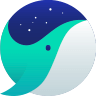
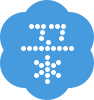

In [ ]:
with open('pc.html','rb') as f:
    data = f.read().decode('utf-8')
    print(data)

##### 모듈5

In [ ]:
import urllib
response = urllib.request.urlopen('https://naver.com')
soup = BeautifulSoup(response, 'html.parser')
soup
print(soup.find('a'),'\n')
print(soup.find(class_='link_newsstand'),'\n')
print(soup.find('a',{'class':'link_newsstand'}))

<a href="#newsstand"><span>뉴스스탠드 바로가기</span></a> 

<a class="link_newsstand" data-clk="title" href="http://newsstand.naver.com/" target="_blank">뉴스스탠드</a> 

<a class="link_newsstand" data-clk="title" href="http://newsstand.naver.com/" target="_blank">뉴스스탠드</a>


##### 모듈6

In [ ]:
import urllib
from bs4 import BeautifulSoup
response = urllib.request.urlopen('https://naver.com')
byte_data = response.read()
html = byte_data.decode('utf-8')
soup = BeautifulSoup(html, 'html.parser')

# print(soup.find_all('a'))
# print(soup.find_all(class_='link_newsstand'),'\n')
print(soup.find_all('a',{'class':'link_newsstand'}))

[<a class="link_newsstand" data-clk="title" href="http://newsstand.naver.com/" target="_blank">뉴스스탠드</a>]


In [ ]:
nlists = soup.findAll('a',{'class':{'link_newsstand','btn_sort','btn_sort.sort_on'}})
for n in nlists:
#     print(n.text)
    print(n.get_text())

뉴스스탠드
구독한 언론사
전체언론사


##### 모듈7

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

html = urlopen('https://naver.com')
bs = BeautifulSoup(html,'html.parser')

hlists = bs.findAll({'h1','h2','h3','h4','h5','h6'},limit=3)
for h in hlists:
    print(h, '\n')

<h1 class="logo_default">
<a class="logo_naver" data-clk="top.logo" href="/"><span class="blind">네이버</span></a>
</h1> 

<h2 class="blind">뉴스스탠드</h2> 

<h2 class="blind">주제별 캐스트</h2> 



In [ ]:
hlists = bs.findAll({'h1','h2','h3','h4','h5','h6'}, text='뉴스스탠드')
print(hlists)

[<h2 class="blind">뉴스스탠드</h2>]


<ipython-input-14-9156de9e22de>:1: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  hlists = bs.findAll({'h1','h2','h3','h4','h5','h6'}, text='뉴스스탠드')


##### 모듈8

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
html = urlopen('https://naver.com')
bs = BeautifulSoup(html,'html.parser')
ttls = bs.findAll(id='NM_NEWSSTAND_TITLE')
for t in ttls:
    print(t)
len(t)

<div class="group_title" data-clk-prefix="nsd" id="NM_NEWSSTAND_TITLE"> <a class="link_newsstand" data-clk="title" href="http://newsstand.naver.com/" target="_blank">뉴스스탠드</a> <div class="sort_area" id="NM_NEWSSTAND_data_buttons" role="tablist"> <a aria-controls="NM_NEWSSTAND_MY_LIST" aria-selected="false" class="btn_sort" data-clk="my" data-type="my" href="#" role="tab">구독한 언론사</a> <a aria-controls="NM_NEWSSTAND_DEFAULT_THUMB" aria-selected="true" class="btn_sort" data-clk="all" data-type="all" href="#" role="tab">전체언론사</a> </div> <div class="set_area" id="NM_NEWSSTAND_view_buttons" role="tablist"> <a aria-controls="NM_NEWSSTAND_DEFAULT_LIST" aria-selected="false" class="btn_set" data-clk="articleview" data-type="list" href="#" role="tab"> <i class="ico_list"><span class="blind">리스트형</span></i></a> <a aria-controls="NM_NEWSSTAND_DEFAULT_THUMB" aria-selected="true" class="btn_set" data-clk="pressview" data-type="thumb" href="#" role="tab"> <i class="ico_tile"><span class="blind">썸네일형</

7

In [ ]:
titles = bs.findAll(id='NM_NEWSSTAND_TITLE',class_='group_title')
for t in titles:
    print(t.text)


 뉴스스탠드  구독한 언론사 전체언론사    리스트형  썸네일형  설정  


##### 모듈9

In [ ]:
import requests
from bs4 import BeautifulSoup
req = requests.get('https://naver.com')
html = req.text
soup = BeautifulSoup(html, 'html.parser')
print(soup.select_one('a'))

<a href="#newsstand"><span>뉴스스탠드 바로가기</span></a>


[<a href="#newsstand"><span>뉴스스탠드 바로가기</span></a>, <a href="#themecast"><span>주제별캐스트 바로가기</span></a>, <a href="#timesquare"><span>타임스퀘어 바로가기</span></a>, <a href="#shopcast"><span>쇼핑캐스트 바로가기</span></a>, <a href="#account"><span>로그인 바로가기</span></a>, <a class="_3h-N8T9V" data-clk="dropbanner1a" href="https://whale.naver.com/ko/details/security/&amp;wpid=RydDy7"></a>, <a class="_2aeXMlrb BMgpjddw" data-clk="dropdownload1a" href="https://installer-whale.pstatic.net/downloads/banner/RydDy7/WhaleSetup.exe" id="NM_whale_download_btn"><span style="background-color: #0436c7">다운로드</span></a>, <a class="logo_naver" data-clk="top.logo" href="/"><span class="blind">네이버</span></a>, <a class="link_set" data-clk="top.mkhome" href="https://help.naver.com/support/welcomePage/guide.help" id="NM_set_home_btn">네이버를 시작페이지로</a>, <a class="link_jrnaver" data-clk="top.jrnaver" href="https://jr.naver.com"><i class="ico_jrnaver"></i><span class="blind">쥬니어네이버</span></a>, <a class="link_happybin" data-clk="top.hap
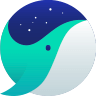
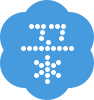

In [ ]:
print(soup.select('a'))

<a href="#newsstand"><span>뉴스스탠드 바로가기</span></a> 

[<a href="#newsstand"><span>뉴스스탠드 바로가기</span></a>, <a href="#themecast"><span>주제별캐스트 바로가기</span></a>, <a href="#timesquare"><span>타임스퀘어 바로가기</span></a>, <a href="#shopcast"><span>쇼핑캐스트 바로가기</span></a>, <a href="#account"><span>로그인 바로가기</span></a>, <a class="_3h-N8T9V" data-clk="dropbanner1a" href="https://whale.naver.com/ko/details/security/&amp;wpid=RydDy7"></a>, <a class="_2aeXMlrb BMgpjddw" data-clk="dropdownload1a" href="https://installer-whale.pstatic.net/downloads/banner/RydDy7/WhaleSetup.exe" id="NM_whale_download_btn"><span style="background-color: #0436c7">다운로드</span></a>, <a class="logo_naver" data-clk="top.logo" href="/"><span class="blind">네이버</span></a>, <a class="link_set" data-clk="top.mkhome" href="https://help.naver.com/support/welcomePage/guide.help" id="NM_set_home_btn">네이버를 시작페이지로</a>, <a class="link_jrnaver" data-clk="top.jrnaver" href="https://jr.naver.com"><i class="ico_jrnaver"></i><span class="blind">쥬니어네이버</sp
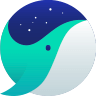
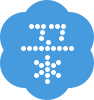

In [ ]:
print(soup.select_one('body a'),'\n')
print(soup.select('body a'))

In [ ]:
print(soup.select_one('div > ul'),'\n')
print(soup.select_one('div  ul'),'\n')
print(soup.select('div > ul'))

<ul class="kwd_lst _recent">
<!-- 최근검색어 템플릿 -->
<!-- [AU] _item 클래스를 추가해주세요. -->
<!-- [AU] data-template-type="history" data-keyword="@in_txt@" attribute를 추가해주세요. -->
<li class="item _item" data-keyword="@in_txt@" data-rank="@rank@" data-template-type="history">
<a class="kwd" href="#">
<span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span><span>@txt@</span></span>
</a>
<span class="etc">
<em class="date">@date@.</em>
<!-- [AU] _del 클래스를 추가해주세요. -->
<a aria-pressed="false" class="bt_item _del" href="#" role="button"><i class="imsc ico_del">삭제</i></a>
</span>
</li>
</ul> 

<ul class="kwd_lst _recent">
<!-- 최근검색어 템플릿 -->
<!-- [AU] _item 클래스를 추가해주세요. -->
<!-- [AU] data-template-type="history" data-keyword="@in_txt@" attribute를 추가해주세요. -->
<li class="item _item" data-keyword="@in_txt@" data-rank="@rank@" data-template-type="history">
<a class="kwd" href="#">
<span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span><span>@txt@</span

##### 모듈10

In [ ]:
# 네이버 환율 가져오기
from bs4 import BeautifulSoup
import urllib.request as req
# HTML 가져오기
url = "https://finance.naver.com/marketindex/"
res = req.urlopen(url)
# HTML 분석하기
soup = BeautifulSoup(res, "html.parser")
# 원하는 데이터 추출하기 --- (※1)
price = soup.select_one("div.head_info > span.value").string
print("usd/krw =", price)

usd/krw = 1,335.70


##### 모듈11

In [ ]:
# Q. 코스피 지수, 등락폭 및 등락율을 출력하세요.
import requests
from bs4 import BeautifulSoup

# 네이버 금융 국내증시 메인 사이트 주소
# url = "https://finance.naver.com/sise/"
url = 'https://finance.naver.com/sise/sise_index.naver?code=KOSPI'

# 웹사이트 정보 요청
html = requests.get(url).text

# html.parser로 html 형식 태그에서 데이터 추출 준비
soup = BeautifulSoup(html, 'html.parser')
print(soup.prettify())

<script type="text/javascript">
 function mainSiseMove(code) {
	if (code=='KONEX') {
		document.location.href='/sise/konex.naver';
	} else if(code=='ETF') {
		document.location.href='/sise/etf.naver';
    } else if(code=='ETN') {
        document.location.href='/sise/etn.naver';
	} else {
		document.location.href='/sise/sise_index.naver?code='+code;
	}
}
</script>
<!--  global include -->
<html lang="ko">
 <head>
  <title>
   코스피 : 네이버 증권
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="text/javascript" http-equiv="Content-Script-Type"/>
  <meta content="text/css" http-equiv="Content-Style-Type"/>
  <meta content="네이버 증권" name="apple-mobile-web-app-title">
   <meta content="http://finance.naver.com/sise/sise_index.naver" property="og:url">
    <meta content="코스피 : 네이버 증권" property="og:title"/>
    <meta content="관심종목의 실시간 주가를 가장 빠르게 확인하는 곳" property="og:description"/>
    <meta content="https://ssl.pstatic.net/static/m/stock/im/2016/08/

In [ ]:
soup.select_one('#now_value').string


'2,485.68'

In [ ]:
soup.select_one('em#now_value').string



'2,485.68'

In [ ]:
soup.select('span#change_value_and_rate > span')[0].text

'3.34'

In [ ]:
soup.select('span.fluc#change_value_and_rate')[0].text[5:10]

'-0.13'

In [ ]:
soup.select('span#change_value_and_rate > span')[0].text

'3.34'

In [ ]:
# soup.select_one('#now_value').string
float(soup.select_one('#now_value').string.replace(',', ''))


2485.68

### 기상청 날씨누리


[학습 포인트]
1.	urllib.parse.urlencode() 함수를 사용하여 매개변수를 URL 인코딩합니다.
2.	인코딩된 매개변수를 URL의 쿼리 스트링으로 추가하여 전용 URL을 생성합니다.
3.	urllib.request.urlopen() 함수를 사용하여 URL에 요청을 보내고, 응답 데이터를 받아옵니다.
4.	응답 데이터를 decode() 메서드를 사용하여 디코딩합니다.


In [ ]:
import urllib.request
import urllib.parse
API = "http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp"
# 매개변수를 URL 인코딩합니다. --- (※1)
values = {
    'stnId': '105'
}
params = urllib.parse.urlencode(values)
# 요청 전용 URL을 생성합니다. --- (※2)
url = API + "?" + params
print("url=", url)
# 다운로드합니다. --- (※3)
data = urllib.request.urlopen(url).read()
text = data.decode("utf-8")
print(text)

url= http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp?stnId=105
<?xml version="1.0" encoding="utf-8" ?>
<rss version="2.0">
<channel>
<title>기상청 육상 중기예보</title>
<link>http://www.kma.go.kr/weather/forecast/mid-term_03.jsp</link>
<description>기상청 날씨 웹서비스</description>
<language>ko</language>
<generator>기상청</generator>
<pubDate>2023년 04월 26일 (수)요일 06:00</pubDate>
 <item>
<author>기상청</author>
<category>육상중기예보</category>
<title>강원도 육상 중기예보 - 2023년 04월 26일 (수)요일 06:00 발표</title>
<link>http://www.kma.go.kr/weather/forecast/mid-term_03.jsp</link>
<guid>http://www.kma.go.kr/weather/forecast/mid-term_03.jsp</guid>
<description>
	<header>
		<title>강원도 육상중기예보</title>
		<tm>202304260600</tm>
		<wf><![CDATA[○ (하늘상태) 30일(일)~5월 2일(화)에는 대체로 맑겠으나, 그 밖의 날에는 대체로 흐리겠습니다.<br />○ (기온) 이번 예보기간 아침 기온은 5~15도, 낮 기온은 15~26도로 평년(최저기온 4~12도, 최고기온 16~25도)과 비슷하겠습니다.<br />○ (해상) 동해중부해상의 물결은 1.0~2.0m로 일겠습니다.<br />○ (주말전망) 29일(토)은 대체로 흐리겠고, 30일(일)은 대체로 맑겠습니다. 아침 기온은 6~15도, 낮 기온은 15~23도가 되겠습니다.<br /><br />* 29일(토)

### 데이터 자격검정 (Kdata.com)

[학습 포인트]
1.	urllib.request.urlopen 함수를 사용하여 웹 페이지의 HTML 데이터를 가져올 수 있습니다.
2.	BeautifulSoup 모듈을 사용하여 HTML 데이터를 파싱하고, 원하는 정보를 추출할 수 있습니다.
3.	soup.select() 또는 soup.findAll() 함수를 사용하여 HTML 태그의 특정 요소를 찾을 수 있습니다.
4.	string 속성 또는 text 속성을 사용하여 태그 내부의 텍스트 데이터를 추출할 수 있습니다.


In [ ]:
# urlopen + BeautifulSoup 조합

from bs4 import BeautifulSoup
import urllib.request as req
url = "https://www.dataq.or.kr/www/sub/a_07.do"
# urlopen()으로 데이터 가져오기 
res = req.urlopen(url)
# BeautifulSoup으로 분석하기 
soup = BeautifulSoup(res, 'html.parser')
# li_list = soup.select("#content > div.contents > div")
print(soup)

<!DOCTYPE HTML>

<html lang="ko">
<head>
<title>데이터자격시험</title>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
<!-- 캐시 방지 -->
<meta content="No-Cache" http-equiv="Pragma">
<meta content="no-cache; must-revalidate; no-store" http-equiv="Cache-Control">
<meta content="now" http-equiv="Expires">
<link href="/www/images/favicon.png" rel="shortcut icon"/>
<link href="/www/css/plugins/jquery-ui-1.9.2.custom.css?v=051802" rel="stylesheet" type="text/css">
<link href="/www/css/fonts/NanumSquare/nanumsquare.css?v=051802" rel="stylesheet" type="text/css"/>
<link href="/www/css/fonts/NotoSansKR/NotoSansKR.css?v=051802" rel="stylesheet" type="text/css"/>
<link href="/www/css/fonts/XEIcon/xeicon.min.css?v=051802" rel="stylesheet" type="text/css"/>
<link href="/www/css/fonts/simple-line-icons/css/simple-line-icons.css?v=051802" rel="stylesheet" type="text/css"/>
<link href

In [ ]:
lts = soup.findAll({'h3','h4','p'})
for l in lts:
    print(l.string)

국가기술자격
관련 근거
국가기술자격법 및 동법 시행령
빅데이터분석기사 정의
빅데이터 이해를 기반으로 빅데이터 분석 기획, 빅데이터 수집·저장·처리, 빅데이터 분석 및 시각화를 수행하는 실무자를 말한다.
빅데이터분석기사의 필요성
전 세계적으로 빅데이터가 미래성장동력으로 인식돼, 각국 정부에서는 관련 기업투자를 끌어내는 등 국가·기업의 주요 전략분야로 부상하고 있다.
 국가와 기업의 경쟁력 확보를 위해 빅데이터 분석 전문가의 수요는 증가하고 있으나, 수요 대비 공급 부족으로 인력 확보에 어려움이 높은 실정이다. 
이에 정부차원에서 빅데이터 분석 전문가 양성과 함께 체계적으로 역량을 검증할 수 있는 국가기술자격 수요가 높은 편이다.
빅데이터분석기사의 직무
대용량의 데이터 집합으로부터 유용한 정보를 찾고 결과를 예측하기 위해 목적에 따라 분석기술과 방법론을 기반으로 정형/비정형 대용량 데이터를 구축, 탐색, 분석하고 시각화를 수행하는 업무를 수행한다.
과목 및 내용
필기
실기
출제문항수
출제기준(필기)
과목별 주요 항목
출제기준(실기)
※ 필기시험 면제기간은 필기합격자 발표일로부터 2년
(다만, 발표일부터 2년동안 검정이 2회 미만으로 시행된 경우에는 그 다음 회차 필기시험 1회를 면제)
과목별 주요 항목
응시자격
비고
1. 대학 및 대학원 수료자로서 학위를 취득하지 못한 사람은 "대학졸업자등", 전 과정의 2분의 1 이상을 마친 사람은 "2년제 전문대학졸업자등"에 해당
2. "졸업예정자"란 필기시험일 기준으로 최종 학년에 재학 중인 사람
None
4. 전공심화과정의 학사학위를 취득한 사람은 “대학졸업자”, 그 졸업예정자는 “대학졸업예정자”에 해당
5. "이수자"란 기사 수준 기술훈련과정 또는 산업기사 수준 기술훈련과정을 마친 사람
6. "이수예정자"란 국가기술자격 검정의 필기시험일 또는 최초 시험일 현재 기사 수준 기술훈련과정 또는 산업기사 수준 기술훈련과정에서 각 과정의 2분의 1을 초과하여 교육훈련을 받고 있는 사람
7. 산업기사 등급 이상의 자격 취득자 및 3

In [ ]:
texts = soup.findAll(id='tab1')
# texts = soup.select('#tab1')
for t in texts:
    print(t.text)


국가기술자격


관련 근거

국가기술자격법 및 동법 시행령



빅데이터분석기사 정의

빅데이터 이해를 기반으로 빅데이터 분석 기획, 빅데이터 수집·저장·처리, 빅데이터 분석 및 시각화를 수행하는 실무자를 말한다.



빅데이터분석기사의 필요성

전 세계적으로 빅데이터가 미래성장동력으로 인식돼, 각국 정부에서는 관련 기업투자를 끌어내는 등 국가·기업의 주요 전략분야로 부상하고 있다.
 국가와 기업의 경쟁력 확보를 위해 빅데이터 분석 전문가의 수요는 증가하고 있으나, 수요 대비 공급 부족으로 인력 확보에 어려움이 높은 실정이다. 
이에 정부차원에서 빅데이터 분석 전문가 양성과 함께 체계적으로 역량을 검증할 수 있는 국가기술자격 수요가 높은 편이다.



빅데이터분석기사의 직무

대용량의 데이터 집합으로부터 유용한 정보를 찾고 결과를 예측하기 위해 목적에 따라 분석기술과 방법론을 기반으로 정형/비정형 대용량 데이터를 구축, 탐색, 분석하고 시각화를 수행하는 업무를 수행한다.






In [ ]:
from bs4 import BeautifulSoup 
fp = open("books.html", encoding="utf-8")
soup = BeautifulSoup(fp, "html.parser")
# CSS 선택자로 검색하는 방법
sel = lambda q : print(soup.select_one(q).string)
sel("#nu")  #(※1)
sel("li#nu")  #(※2)
sel("ul > li#nu")  #(※3)
sel("#bible #nu")  #(※4)
sel("#bible > #nu")  #(※5)
sel("ul#bible > li#nu")  #(※6)
sel("li[id='nu']")  #(※7)
sel("li:nth-of-type(4)")  #(※8)
# 그 밖의 방법
print(soup.select("li")[3].string)   #(※9)
print(soup.find_all("li")[3].string) #(※10)

FileNotFoundError: ignored

In [ ]:
from bs4 import BeautifulSoup 
fp = open("fruits-vegetables.html", encoding="utf-8")
soup = BeautifulSoup(fp, "html.parser")
# CSS 선택자로 추출하기
print(soup.select_one("li:nth-of-type(3)").string)  #(※1)
print(soup.select_one("#ve-list > li:nth-of-type(4)").string)  #(※2)
print(soup.select("#ve-list > li[data-lo='us']")[1].string)  #(※3)
print(soup.select("#ve-list > li.black")[1].string)  #(※4)
# find 메서드로 추출하기 ---- (※5)
cond = {"data-lo":"us", "class":"black"}
print(soup.find("li", cond).string)
# find 메서드를 연속적으로 사용하기 --- (※6)
print(soup.find(id="ve-list")
           .find("li", cond).string)

FileNotFoundError: ignored